# Notebook 3: Churn Modeling and Visualization

This notebook covers:
1. Loading cleaned data
2. Training machine learning model for churn prediction
3. Evaluating model performance
4. Generating model-related visualizations
5. Creating dashboard-style plots

## Setup and Imports

In [1]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import project modules
from src.models.churn_model import train_model, get_feature_names
from src.models.evaluation import evaluate_model, plot_confusion_matrix
from src.visualization.churn_dashboard_plots import (
    plot_balance_by_churn,
    plot_churn_by_age_group,
    plot_churn_by_products,
    plot_feature_importance
)
from src.config import CLEAN_CHURN_FILE

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ All imports successful!")

✓ All imports successful!


## Step 1: Load Cleaned Data

In [2]:
# Load the cleaned churn dataset
df = pd.read_csv(CLEAN_CHURN_FILE)
print(f"Dataset shape: {df.shape}")
print(f"Churn rate: {df['Exited'].mean():.2%}")
df.head()

Dataset shape: (10000, 13)
Churn rate: 20.37%


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,IncomeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,36-45,Mid
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,36-45,Mid
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,36-45,Mid
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,36-45,Mid
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,36-45,Mid


## Step 2: Train Churn Prediction Model

In [3]:
# Train Logistic Regression model
model, X_train, X_test, y_train, y_test, feature_names = train_model(df, model_type='logistic')


TRAINING CHURN PREDICTION MODEL

✓ Features prepared: 8 features, 10000 samples
  Numeric features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
  Categorical features: ['Geography', 'Gender']
  Target variable: Exited

✓ Data split:
  Training set: 7000 samples
  Test set: 3000 samples
  Churn rate in train: 20.37%
  Churn rate in test: 20.37%
✓ Created Logistic Regression pipeline

Training logistic model...
✓ Model training complete!

MODEL TRAINING COMPLETE



In [4]:
# Display feature names after preprocessing
print("\nFeatures used in the model:")
for i, name in enumerate(feature_names, 1):
    print(f"{i:2d}. {name}")


Features used in the model:
 1. CreditScore
 2. Age
 3. Tenure
 4. Balance
 5. NumOfProducts
 6. EstimatedSalary
 7. Geography_Germany
 8. Geography_Spain
 9. Gender_Male


## Step 3: Evaluate Model Performance

In [5]:
# Evaluate the model
results = evaluate_model(model, X_test, y_test, verbose=True)


MODEL EVALUATION RESULTS

Accuracy: 0.8003 (80.03%)
ROC-AUC Score: 0.7643

Confusion Matrix:
[[2327   62]
 [ 537   74]]

Classification Report:
              precision    recall  f1-score   support

    Retained       0.81      0.97      0.89      2389
     Churned       0.54      0.12      0.20       611

    accuracy                           0.80      3000
   macro avg       0.68      0.55      0.54      3000
weighted avg       0.76      0.80      0.75      3000




✓ Saved: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/reports/figures/confusion_matrix.png


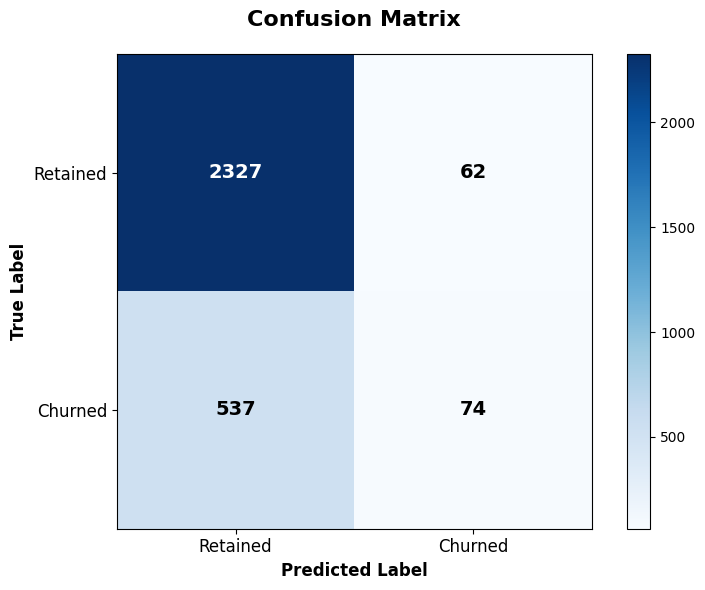

In [6]:
# Plot confusion matrix
plot_confusion_matrix(results['confusion_matrix'], save=True, show=True)

In [7]:
# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, results['y_pred'])
recall = recall_score(y_test, results['y_pred'])
f1 = f1_score(y_test, results['y_pred'])

print("\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {results['roc_auc']:.4f}")


Additional Metrics:
Precision: 0.5441
Recall: 0.1211
F1-Score: 0.1981
ROC-AUC: 0.7643


## Step 4: Feature Importance Analysis

✓ Saved: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/reports/figures/feature_importance.png


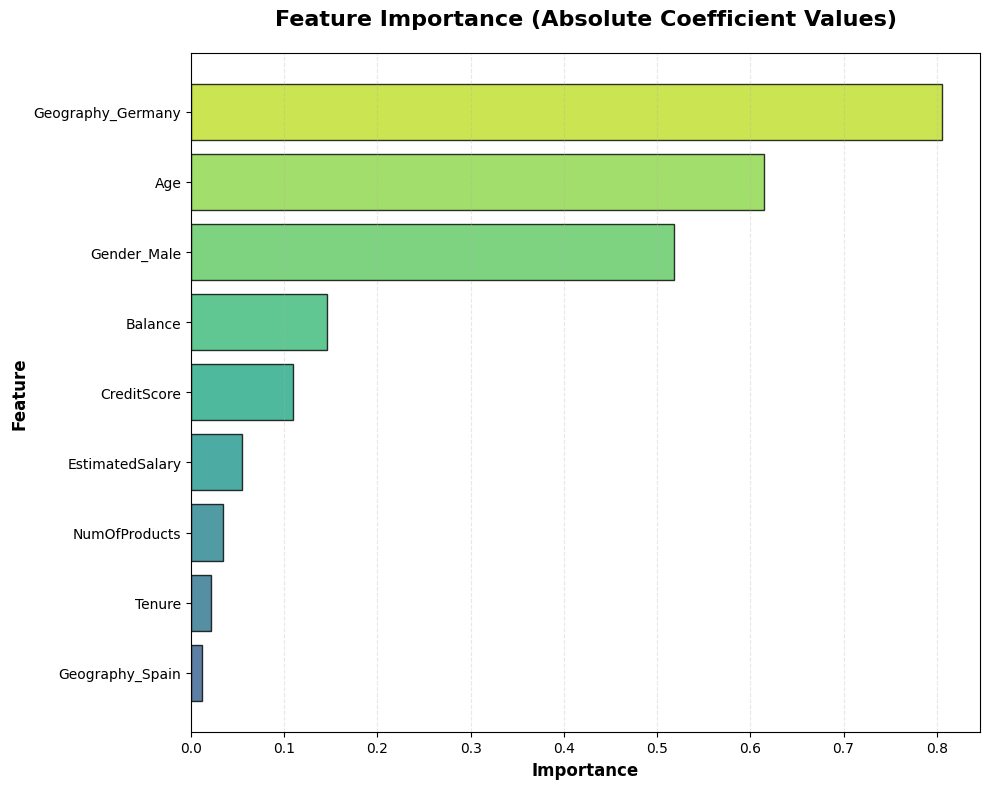

In [8]:
# Get the trained classifier from the pipeline
classifier = model.named_steps['classifier']

# Plot feature importance
plot_feature_importance(classifier, feature_names, save=True, show=True, top_n=15)

In [9]:
# Display coefficients in a table
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': classifier.coef_[0],
    'abs_coefficient': np.abs(classifier.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("\nTop 15 Most Important Features (by absolute coefficient):")
print(coef_df.head(15).to_string(index=False))


Top 15 Most Important Features (by absolute coefficient):
          feature  coefficient  abs_coefficient
Geography_Germany     0.806102         0.806102
              Age     0.614853         0.614853
      Gender_Male    -0.518005         0.518005
          Balance     0.145575         0.145575
      CreditScore    -0.109286         0.109286
  EstimatedSalary     0.054277         0.054277
    NumOfProducts    -0.034427         0.034427
           Tenure     0.021533         0.021533
  Geography_Spain     0.011966         0.011966


## Step 5: Dashboard Visualizations

✓ Saved: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/reports/figures/balance_by_churn.png


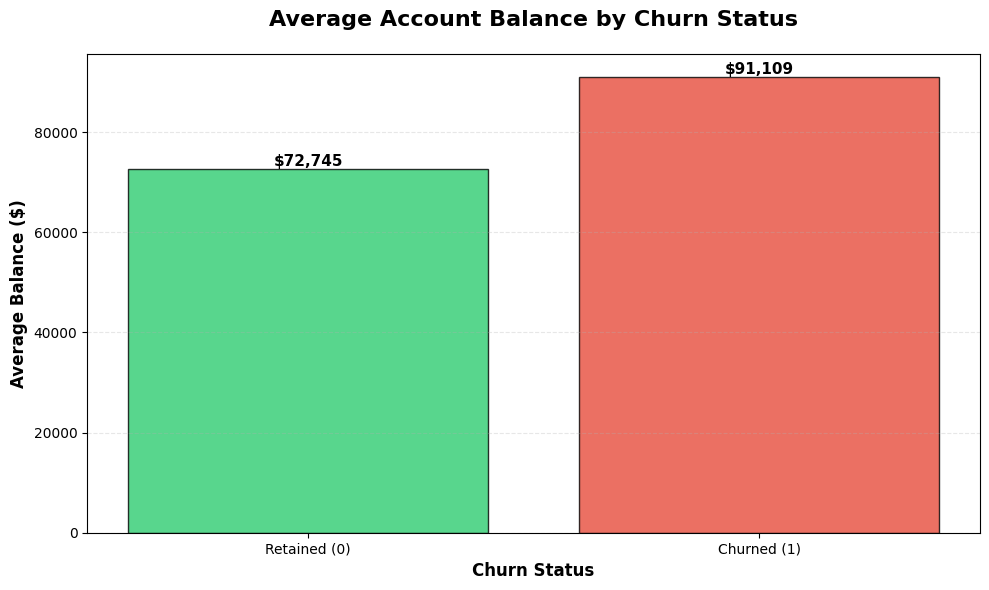

In [10]:
# Plot average balance by churn status
plot_balance_by_churn(df, save=True, show=True)

✓ Saved: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/reports/figures/churn_by_age_group.png


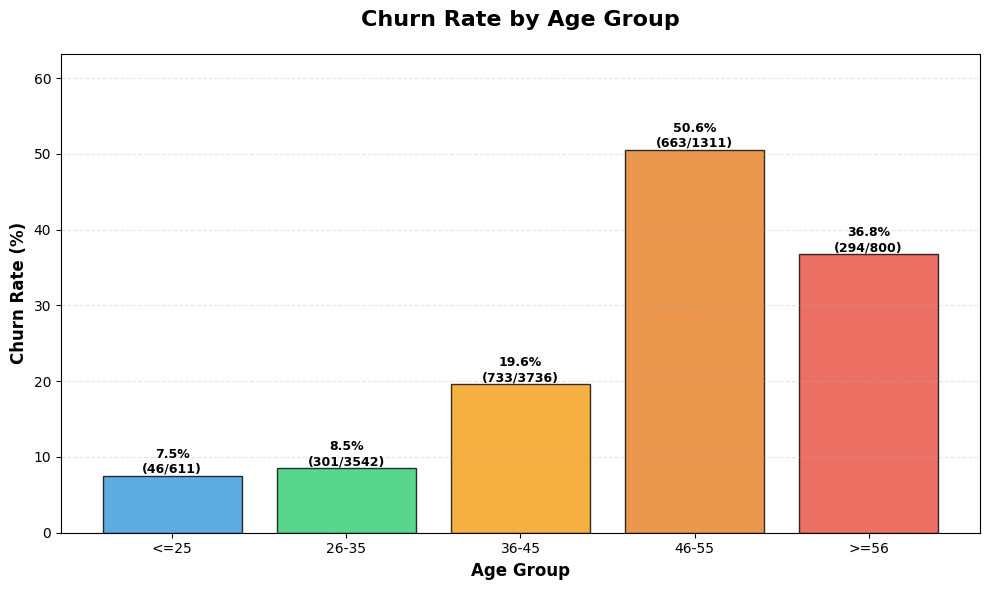

In [11]:
# Plot churn rate by age group
plot_churn_by_age_group(df, save=True, show=True)

✓ Saved: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/reports/figures/churn_by_products.png


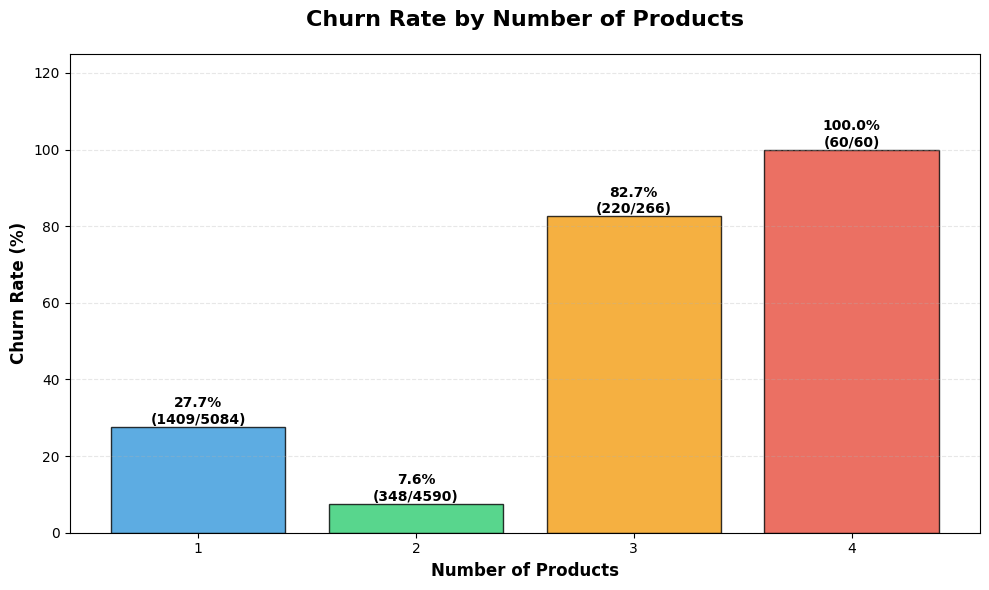

In [12]:
# Plot churn rate by number of products
plot_churn_by_products(df, save=True, show=True)

## Step 6: Model Predictions on Sample Data

In [13]:
# Make predictions on a few sample customers
sample_customers = X_test.head(10)
sample_predictions = model.predict(sample_customers)
sample_probabilities = model.predict_proba(sample_customers)[:, 1]

# Create results DataFrame
sample_results = pd.DataFrame({
    'Actual_Churn': y_test.head(10).values,
    'Predicted_Churn': sample_predictions,
    'Churn_Probability': sample_probabilities
})

sample_results['Prediction_Correct'] = (sample_results['Actual_Churn'] == sample_results['Predicted_Churn'])

print("\nSample Predictions:")
print(sample_results.to_string(index=False))


Sample Predictions:
 Actual_Churn  Predicted_Churn  Churn_Probability  Prediction_Correct
            0                0           0.081398                True
            0                0           0.112426                True
            0                0           0.172249                True
            0                0           0.156813                True
            0                0           0.394852                True
            0                0           0.321031                True
            0                0           0.163803                True
            0                0           0.347863                True
            0                0           0.090848                True
            0                0           0.210905                True


## Step 7: Business Insights

In [14]:
# Analyze high-risk customers (high churn probability)
all_probabilities = model.predict_proba(X_test)[:, 1]
high_risk_threshold = 0.7

high_risk_count = (all_probabilities >= high_risk_threshold).sum()
high_risk_pct = (high_risk_count / len(all_probabilities)) * 100

print("=" * 60)
print("BUSINESS INSIGHTS")
print("=" * 60)
print(f"\nHigh-Risk Customers (Churn Probability >= {high_risk_threshold}):")
print(f"  Count: {high_risk_count}")
print(f"  Percentage: {high_risk_pct:.2f}%")

# Actual churn in high-risk group
high_risk_mask = all_probabilities >= high_risk_threshold
actual_churn_in_high_risk = y_test[high_risk_mask].sum()
print(f"  Actual churned in this group: {actual_churn_in_high_risk}")
print(f"  Precision for high-risk group: {actual_churn_in_high_risk / high_risk_count:.2%}")

BUSINESS INSIGHTS

High-Risk Customers (Churn Probability >= 0.7):
  Count: 16
  Percentage: 0.53%
  Actual churned in this group: 6
  Precision for high-risk group: 37.50%


In [15]:
# Key findings from the model
print("\n" + "=" * 60)
print("KEY FINDINGS")
print("=" * 60)

print("\n1. Model Performance:")
print(f"   - Accuracy: {results['accuracy']:.2%}")
print(f"   - ROC-AUC: {results['roc_auc']:.4f}")
print(f"   - The model can identify churners with reasonable accuracy")

print("\n2. Top Churn Indicators (from feature importance):")
top_3_features = coef_df.head(3)
for idx, row in top_3_features.iterrows():
    direction = "increases" if row['coefficient'] > 0 else "decreases"
    print(f"   - {row['feature']}: {direction} churn risk")

print("\n3. Churn Patterns:")
print(f"   - Overall churn rate: {df['Exited'].mean():.2%}")
print(f"   - Customers with higher age tend to churn more")
print(f"   - Geography plays a significant role in churn")
print(f"   - Active membership status is protective against churn")


KEY FINDINGS

1. Model Performance:
   - Accuracy: 80.03%
   - ROC-AUC: 0.7643
   - The model can identify churners with reasonable accuracy

2. Top Churn Indicators (from feature importance):
   - Geography_Germany: increases churn risk
   - Age: increases churn risk
   - Gender_Male: decreases churn risk

3. Churn Patterns:
   - Overall churn rate: 20.37%
   - Customers with higher age tend to churn more
   - Geography plays a significant role in churn
   - Active membership status is protective against churn


## Optional: Train Random Forest Model (for comparison)

In [16]:
# Uncomment to train Random Forest model
print("\n" + "="*60)
print("TRAINING RANDOM FOREST MODEL (for comparison)")
print("="*60)

rf_model, X_train_rf, X_test_rf, y_train_rf, y_test_rf, feature_names_rf = train_model(df, model_type='random_forest')
rf_results = evaluate_model(rf_model, X_test_rf, y_test_rf, verbose=True)

print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {results['accuracy']:.4f}")
print(f"Random Forest Accuracy: {rf_results['accuracy']:.4f}")


TRAINING RANDOM FOREST MODEL (for comparison)

TRAINING CHURN PREDICTION MODEL

✓ Features prepared: 8 features, 10000 samples
  Numeric features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
  Categorical features: ['Geography', 'Gender']
  Target variable: Exited

✓ Data split:
  Training set: 7000 samples
  Test set: 3000 samples
  Churn rate in train: 20.37%
  Churn rate in test: 20.37%
✓ Created Random Forest pipeline with 100 trees

Training random_forest model...
✓ Model training complete!

MODEL TRAINING COMPLETE


MODEL EVALUATION RESULTS

Accuracy: 0.8603 (86.03%)
ROC-AUC Score: 0.8658

Confusion Matrix:
[[2316   73]
 [ 346  265]]

Classification Report:
              precision    recall  f1-score   support

    Retained       0.87      0.97      0.92      2389
     Churned       0.78      0.43      0.56       611

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       